In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename), index_col=0)

df = read_data('./A_DeviceMotion_data/A_DeviceMotion_data/dws_1/', 'sub_1.csv')


def produce_magnitude(df, column):
    df[column+'.mag'] = np.sqrt(df[column+'.x']**2 + df[column+'.y']**2 + df[column+'.z']**2)

produce_magnitude(df, 'userAcceleration')
produce_magnitude(df, 'rotationRate')


df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,userAcceleration.mag,rotationRate.mag
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0.513360,1.370498
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0.250235,1.141648
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0.215450,0.372530
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0.166728,1.049628
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0.408720,0.921229


In [2]:
import numpy as np
import pandas as pd

def get_ds_infos():
   
    dss = pd.read_csv("./data_subjects_info.csv")
    print("[INFO] -- Data subjects' information is imported.")
    
    return dss


def set_data_types(data_types=["userAcceleration"]):
    
    dt_list = []
    for t in data_types:
        if t != "attitude":
            dt_list.append([t+".x",t+".y",t+".z"])
        else:
            dt_list.append([t+".roll", t+".pitch", t+".yaw"])
    print(dt_list)
    return dt_list


def creat_time_series(folder_name, dt_list, act_labels, trial_codes, mode="mag", labeled=True):
    num_data_cols = len(dt_list) if mode == "mag" else len(dt_list*3)
    
    if labeled:
        dataset = np.zeros((0,num_data_cols+7)) # "7" --> [act, code, weight, height, age, gender, trial] 
    else:
        dataset = np.zeros((0,num_data_cols))
        
    ds_list = get_ds_infos()
    
    print("[INFO] -- Creating Time-Series")
    for sub_id in ds_list["code"]:
        for act_id, act in enumerate(act_labels):
            for trial in trial_codes[act_id]:
                fname = folder_name+'/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1)
                vals = np.zeros((len(raw_data), num_data_cols))
                for x_id, axes in enumerate(dt_list):
                    if mode == "mag":
                        vals[:,x_id] = (raw_data[axes]**2).sum(axis=1)**0.5        
                    else:
                        vals[:,x_id*3:(x_id+1)*3] = raw_data[axes].values
                    vals = vals[:,:num_data_cols]
                if labeled:
                    lbls = np.array([[act_id,
                            sub_id-1,
                            ds_list["weight"][sub_id-1],
                            ds_list["height"][sub_id-1],
                            ds_list["age"][sub_id-1],
                            ds_list["gender"][sub_id-1],
                            trial          
                           ]]*len(raw_data), dtype=int)
                    vals = np.concatenate((vals, lbls), axis=1)
                dataset = np.append(dataset,vals, axis=0)
    cols = []
    for axes in dt_list:
        if mode == "raw":
            cols += axes
        else:
            cols += [str(axes[0][:-2])]
            
    if labeled:
        cols += ["act", "id", "weight", "height", "age", "gender", "trial"]
    
    dataset = pd.DataFrame(data=dataset, columns=cols)
    return dataset
#________________________________


ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
TRIAL_CODES = {
    ACT_LABELS[0]:[1,2,11],
    ACT_LABELS[1]:[3,4,12],
    ACT_LABELS[2]:[7,8,15],
    ACT_LABELS[3]:[9,16],
    ACT_LABELS[4]:[6,14],
    ACT_LABELS[5]:[5,13]
}

In [3]:
sdt = [ "userAcceleration"]
print("Selected sensor data types:\n" + str(sdt))
dt_list = set_data_types(sdt)
print("\nSelected columns from dataset:\n" + str(dt_list))

Selected sensor data types:
['userAcceleration']
[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']]

Selected columns from dataset:
[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']]


In [4]:
ACT_LABELS = ["sit", "std", "dws", "ups", "wlk", "jog"]
act_labels = ACT_LABELS [0:6]  # all activities
print("Selected activites: " + str(act_labels))  

Selected activites: ['sit', 'std', 'dws', 'ups', 'wlk', 'jog']


In [5]:
TRIAL_CODES = {
    ACT_LABELS[0]:[5,13],
    ACT_LABELS[1]:[6,14],
    ACT_LABELS[2]:[1,2,11],
    ACT_LABELS[3]:[3,4,12],
    ACT_LABELS[4]:[7,8,15],
    ACT_LABELS[5]:[9,16],
}
TRIAL_CODES = {
    ACT_LABELS[0]:[5],
    ACT_LABELS[1]:[6],
    ACT_LABELS[2]:[1],
    ACT_LABELS[3]:[3],
    ACT_LABELS[4]:[7],
    ACT_LABELS[5]:[9],
}
trial_codes = [TRIAL_CODES[act] for act in act_labels]
print("[INFO] -- Selected trials: " + str(trial_codes))

[INFO] -- Selected trials: [[5], [6], [1], [3], [7], [9]]


In [6]:
print("Loading...")
dataset = creat_time_series("./A_DeviceMotion_data/A_DeviceMotion_data", dt_list, act_labels, trial_codes, mode="mag", labeled=True)
print("Finished!")
print(dataset)

Loading...
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
Finished!
        userAcceleration  act    id  weight  height   age  gender  trial
0               0.006959  0.0   0.0   102.0   188.0  46.0     1.0    5.0
1               0.010673  0.0   0.0   102.0   188.0  46.0     1.0    5.0
2               0.007010  0.0   0.0   102.0   188.0  46.0     1.0    5.0
3               0.014892  0.0   0.0   102.0   188.0  46.0     1.0    5.0
4               0.013001  0.0   0.0   102.0   188.0  46.0     1.0    5.0
...                  ...  ...   ...     ...     ...   ...     ...    ...
830890          1.490388  5.0  23.0    74.0   173.0  18.0     0.0    9.0
830891          5.192210  5.0  23.0    74.0   173.0  18.0     0.0    9.0
830892          4.236564  5.0  23.0    74.0   173.0  18.0     0.0    9.0
830893          1.504475  5.0  23.0    74.0   173.0  18.0     0.0    9.0
830894          1.835329  5.0  23.0    74.0   173.0  18.0     0.0    9.0

[830895 rows x 8 colu

In [7]:
plt.rcParams['figure.figsize'] = (30,8)
plt.rcParams['font.size'] = 32
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
clr1 = ["rs-","r*-","ro-","rv-","rp-","r^-"]
clr2 = ["bs-","b*-","bo-","bv-","bp-","b^-"]
act_lbl = ["Sat", "Stand-Up", "Downstairs", "Upstairs", "Walking", "Jogging"]
lbl = ["rotation", "acceleration"]
period = 2.5 # Seconds
sample_rate = 50 # Hz
points = int(period*sample_rate)
x_ticks = np.arange(0.,points/sample_rate,1./sample_rate)
print("Data points per time-series: " + str(points))

Data points per time-series: 125


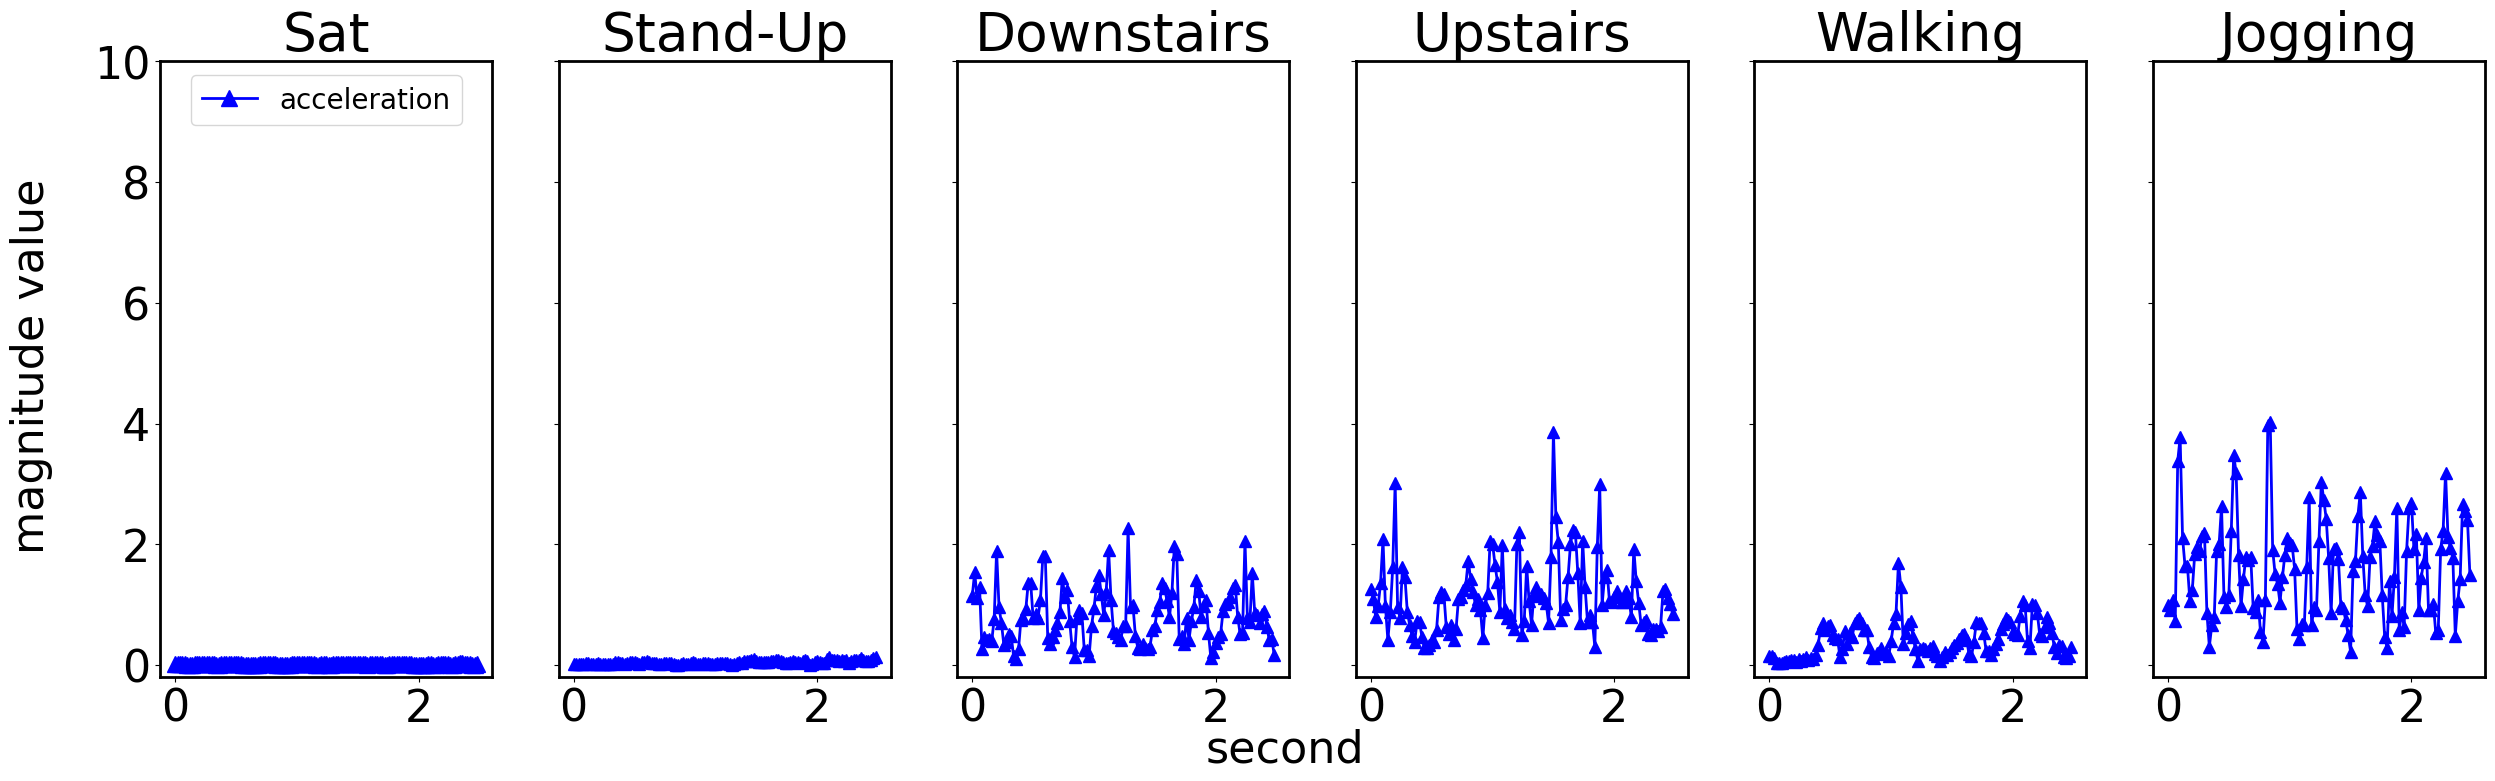

In [8]:
act_data = np.zeros((6,points))
fig, ax = plt.subplots(1, 6, sharex='col', sharey='row')
uid = 12 # We have 24 users in the dataset, uid can be selected from {0,1,...23}
for i in np.unique(dataset["act"]):
    i =int(i)
    data = dataset[(dataset["id"] == uid) & (dataset["act"] == i)]
    acc = data["userAcceleration"].values
    
    acc = acc[:points]
    
    
    if i!=0:
        
        ax[i].plot(x_ticks, acc, "b^-", linewidth=2, markersize=8)
    else:
        
        ax[i].plot(x_ticks, acc, "b^-", linewidth=2, markersize=12, label=lbl[1])

    ax[i].set_title(act_lbl[i])
plt.setp(ax, yticks=np.arange(0, 11, 2))
fig.text(0.5, 0.004, 'second', ha='center')
fig.text(0.075, 0.5, 'magnitude value', va='center', rotation='vertical', )
ax[0].legend(loc="upper center", fontsize = 20)

Here our Data Cleaning and PreProcessing is complete. Now we will train and test our Machine Leaning Model using this DataFrame.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report


# Step 1: Prepare the Data
X = dataset.drop(columns=['act', 'id', 'trial'])  # Features
y = dataset['act']  # Target labels

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sampled_dataset = dataset.sample(n=300000, random_state=42)
from sklearn.model_selection import train_test_split

X_train, _, y_train, _ = train_test_split(dataset.drop(columns=['act', 'id', 'trial']), dataset['act'], test_size=0.64, random_state=42, stratify=dataset['act'])
sampled_dataset = pd.concat([X_train, y_train], axis=1)
sampled_dataset = dataset.head(300000)

In [10]:
# Step 3: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Step 4: Evaluate the Model
y_pred = rf_model.predict(X_test)

# Calculate classification report
report = classification_report(y_test, y_pred, target_names=ACT_LABELS)
print(report)

              precision    recall  f1-score   support

         sit       0.81      0.81      0.81     47048
         std       0.79      0.78      0.79     45067
         dws       0.47      0.47      0.47      9980
         ups       0.50      0.51      0.51     11475
         wlk       0.67      0.67      0.67     31901
         jog       0.72      0.72      0.72     20708

    accuracy                           0.72    166179
   macro avg       0.66      0.66      0.66    166179
weighted avg       0.72      0.72      0.72    166179



Now that our ML Model is trained with an Accuracy F1 score of 0.72. We will now preprocess our raw sensor data and and convert it to the dataframe accepted by our ML model.

In [50]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename), index_col=0)

df2 = read_data('', 'accelerometer_data.csv')
import pandas as pd
df2.dropna(inplace=True)
# Reset the index and rename the columns
df2.reset_index(inplace=True)
df2.rename(columns={'X': 'userAcceleration.x', 'Y': 'userAcceleration.y', 'Z': 'userAcceleration.z'}, inplace=True)


#After reading the CSV data that we got from our Smartphone, we create a fucntion to convert it into time series


def extract_user_acceleration_time_series(df):
    """
    Extracts the userAcceleration magnitude time series from the DataFrame.

    Args:
        df (DataFrame): Input DataFrame containing userAcceleration data.

    Returns:
        DataFrame: Time series DataFrame containing userAcceleration magnitude values with a timestamp/index.
    """
    
    ts_series = pd.Series(df['Timestamp'], name='Timestamp')

    # Calculate the magnitude of userAcceleration
    magnitude_series = (df['userAcceleration.x']**2 + df['userAcceleration.y']**2 + df['userAcceleration.z']**2)**0.5

    # Create a DataFrame with timestamp and magnitude
    time_series_df = pd.concat([ts_series, magnitude_series], axis=1)

    # Set the timestamp column as index to make it a time series
    time_series_df.set_index('Timestamp', inplace=True)

    # Rename the magnitude column
    time_series_df.rename(columns={0: 'userAcceleration'}, inplace=True)
    
    time_series_df['weight'] = 90
    time_series_df['height'] = 185
    time_series_df['age'] = 22
    time_series_df['gender'] = 1
    

    return time_series_df


dataset2 = extract_user_acceleration_time_series(df2)
print(dataset2)

              userAcceleration  weight  height  age  gender
Timestamp                                                  
1.710421e+12          0.234137      90     185   22       1
1.710421e+12          0.019322      90     185   22       1
1.710421e+12          0.027128      90     185   22       1
1.710421e+12          0.025850      90     185   22       1
1.710421e+12          0.013810      90     185   22       1
...                        ...     ...     ...  ...     ...
1.710701e+12          0.101708      90     185   22       1
1.710701e+12          0.065684      90     185   22       1
1.710701e+12          0.087503      90     185   22       1
1.710701e+12          0.022747      90     185   22       1
1.710701e+12          0.065696      90     185   22       1

[3364 rows x 5 columns]


Now that we have converted our raw data to TimeSeries format accepted by our ML Model, we will now insert this data into our ML model to get predictions on user actions.

In [15]:
y_pred2= rf_model.predict(dataset2)
# Mapping numerical predictions to activity labels
predicted_activities = [ACT_LABELS[int(prediction)] for prediction in y_pred2]

print(y_pred2)
# Printing the readable format
print(predicted_activities)

[3. 1. 1. ... 1. 1. 1.]
['ups', 'std', 'std', 'std', 'std', 'sit', 'std', 'std', 'sit', 'sit', 'sit', 'sit', 'std', 'std', 'std', 'std', 'std', 'std', 'sit', 'std', 'std', 'sit', 'std', 'sit', 'sit', 'std', 'sit', 'std', 'sit', 'std', 'sit', 'std', 'std', 'std', 'std', 'std', 'sit', 'sit', 'std', 'std', 'sit', 'sit', 'std', 'std', 'std', 'sit', 'sit', 'std', 'sit', 'std', 'sit', 'std', 'std', 'sit', 'sit', 'std', 'sit', 'std', 'sit', 'sit', 'std', 'sit', 'sit', 'sit', 'sit', 'sit', 'std', 'sit', 'sit', 'std', 'sit', 'std', 'std', 'sit', 'sit', 'sit', 'std', 'std', 'std', 'std', 'std', 'std', 'sit', 'std', 'std', 'std', 'std', 'sit', 'sit', 'sit', 'sit', 'std', 'sit', 'std', 'std', 'std', 'std', 'std', 'std', 'sit', 'sit', 'sit', 'sit', 'std', 'sit', 'sit', 'std', 'std', 'std', 'sit', 'std', 'std', 'std', 'sit', 'sit', 'std', 'std', 'std', 'std', 'wlk', 'ups', 'std', 'ups', 'std', 'std', 'std', 'std', 'ups', 'dws', 'wlk', 'wlk', 'dws', 'ups', 'wlk', 'wlk', 'std', 'std', 'sit', 'sit', 's

In [51]:
dataset2.dropna(inplace=True)
dataset2.reset_index(inplace=True)
# Convert to datetime
dataset2['Timestamp'] = pd.to_datetime(dataset2['Timestamp'], unit='ms')
dataset2['Predicted Activity'] = predicted_activities
dataset2['activity_level'] = y_pred2
print(dataset2)

                         Timestamp  userAcceleration  weight  height  age  \
0    2024-03-14 12:58:41.047000064          0.234137      90     185   22   
1    2024-03-14 12:58:41.140999936          0.019322      90     185   22   
2    2024-03-14 12:58:41.248999936          0.027128      90     185   22   
3    2024-03-14 12:58:41.363000064          0.025850      90     185   22   
4    2024-03-14 12:58:41.460999936          0.013810      90     185   22   
...                            ...               ...     ...     ...  ...   
3359 2024-03-17 18:51:31.808999936          0.101708      90     185   22   
3360 2024-03-17 18:51:31.916000000          0.065684      90     185   22   
3361 2024-03-17 18:51:32.033999872          0.087503      90     185   22   
3362 2024-03-17 18:51:32.123000064          0.022747      90     185   22   
3363 2024-03-17 18:51:32.224000000          0.065696      90     185   22   

      gender Predicted Activity  activity_level  
0          1             

Now we have merged the predicted data with out accelerometer data, we will now link this data with Timestamps and perform analysis with respect to time. This will let us know for long our user was doing what!

In [52]:
new_data = dataset2.drop(columns=['weight','age','gender','height'])
print(new_data)

                         Timestamp  userAcceleration Predicted Activity  \
0    2024-03-14 12:58:41.047000064          0.234137                ups   
1    2024-03-14 12:58:41.140999936          0.019322                std   
2    2024-03-14 12:58:41.248999936          0.027128                std   
3    2024-03-14 12:58:41.363000064          0.025850                std   
4    2024-03-14 12:58:41.460999936          0.013810                std   
...                            ...               ...                ...   
3359 2024-03-17 18:51:31.808999936          0.101708                std   
3360 2024-03-17 18:51:31.916000000          0.065684                std   
3361 2024-03-17 18:51:32.033999872          0.087503                std   
3362 2024-03-17 18:51:32.123000064          0.022747                std   
3363 2024-03-17 18:51:32.224000000          0.065696                std   

      activity_level  
0                3.0  
1                1.0  
2                1.0  
3      

In [53]:
# Remove duplicate timestamps
new_data.drop_duplicates(subset=['Timestamp'], inplace=True)

time_diff_seconds = new_data['Timestamp'].diff().dt.total_seconds()

# Calculate the average time difference (frequency) in Hz
frequency_hz = 1 / time_diff_seconds.mode()
median_time_diff = time_diff_seconds.median()

print(f'Frequency of data collection: {frequency_hz}Hz')
print("Time Difference between each recording:", median_time_diff)

Frequency of data collection: 0    9.900996
Name: Timestamp, dtype: float64Hz
Time Difference between each recording: 0.100999936


In [54]:
new_data['TimeDiff'] = time_diff_seconds
print(new_data)

                         Timestamp  userAcceleration Predicted Activity  \
0    2024-03-14 12:58:41.047000064          0.234137                ups   
1    2024-03-14 12:58:41.140999936          0.019322                std   
2    2024-03-14 12:58:41.248999936          0.027128                std   
3    2024-03-14 12:58:41.363000064          0.025850                std   
4    2024-03-14 12:58:41.460999936          0.013810                std   
...                            ...               ...                ...   
3359 2024-03-17 18:51:31.808999936          0.101708                std   
3360 2024-03-17 18:51:31.916000000          0.065684                std   
3361 2024-03-17 18:51:32.033999872          0.087503                std   
3362 2024-03-17 18:51:32.123000064          0.022747                std   
3363 2024-03-17 18:51:32.224000000          0.065696                std   

      activity_level  TimeDiff  
0                3.0       NaN  
1                1.0     0.094  


In [55]:
# Remove rows with NaN values in 'TimeDfiff' and 'TimeDiff' columns
cleaned_data = new_data.dropna(subset=['TimeDiff'])

# Remove rows with outliers in 'userAcceleration', 'TimeDfiff', and 'TimeDiff' columns
cleaned_data = cleaned_data[(cleaned_data['TimeDiff'] <= cleaned_data['TimeDiff'].quantile(0.99))]

# Group the data by 'Predicted Activity' and sum the time differences for each group
activity_time_summary = cleaned_data.groupby('activity_level')['TimeDiff'].agg(['mean', 'sum'])

# Display the summary of time spent on each activity
print(activity_time_summary)

                    mean        sum
activity_level                     
0.0             0.100286  17.550001
1.0             0.100215  78.168000
2.0             0.100106  16.116999
3.0             0.100005  19.200999
4.0             0.100348  51.579001
5.0             0.100706   8.560000


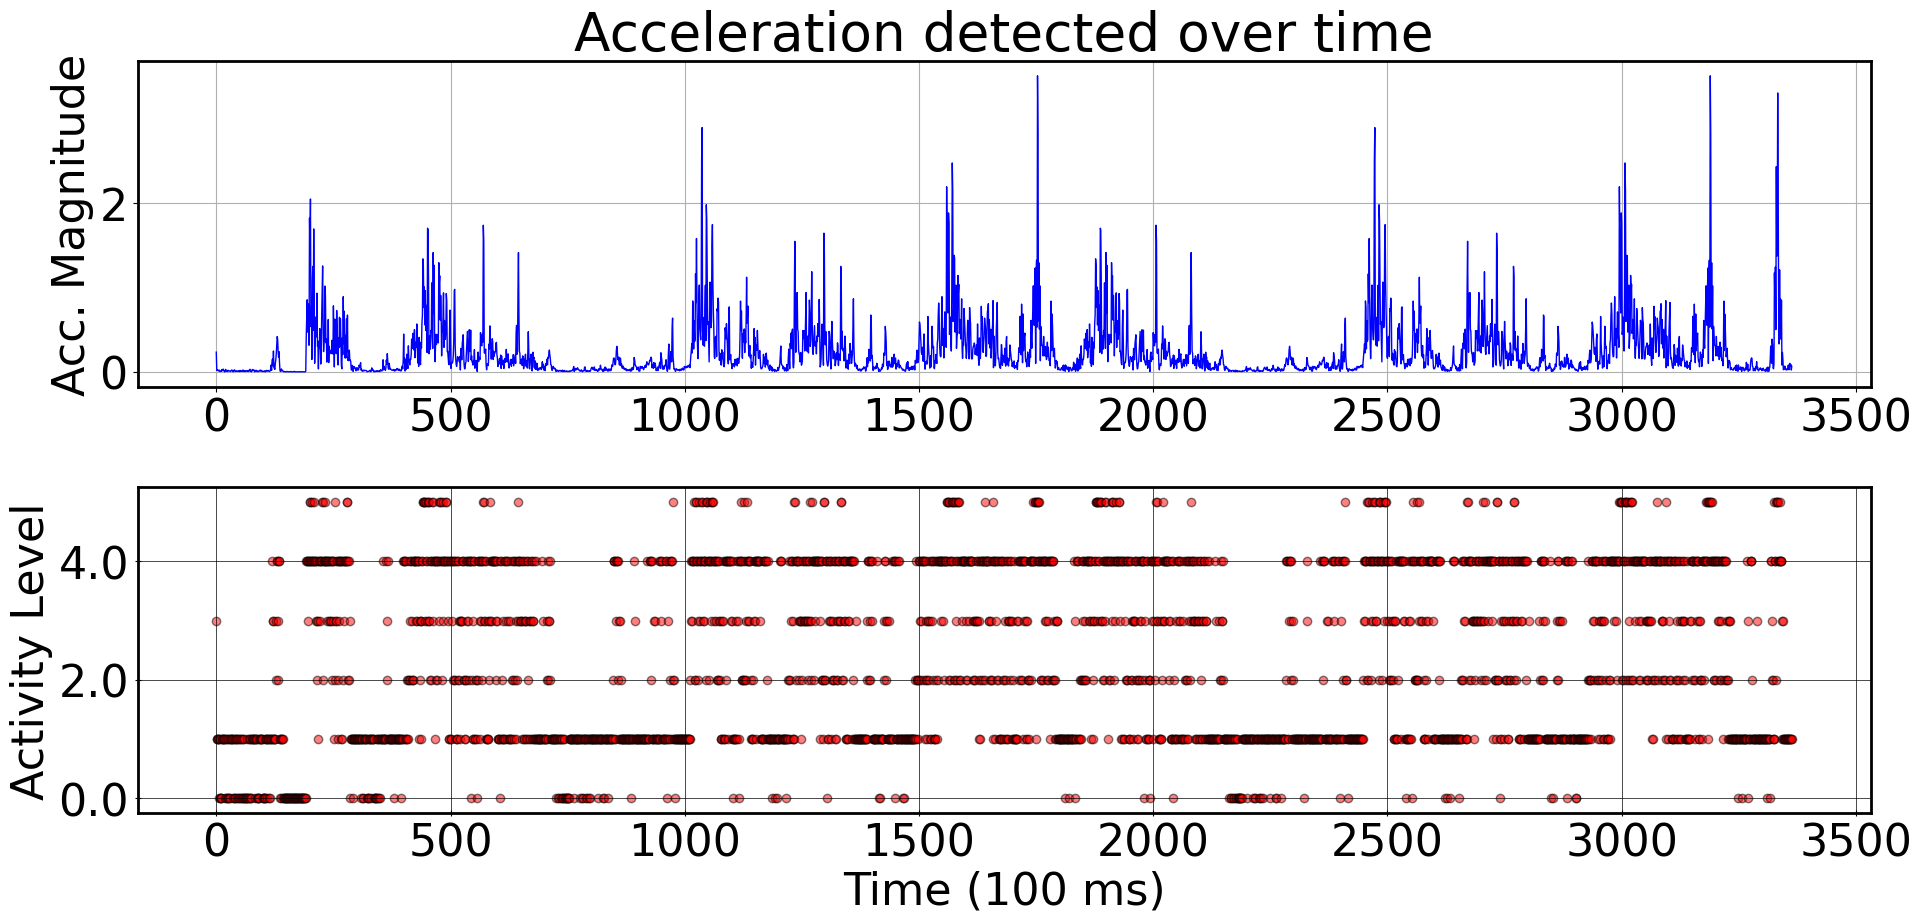

In [76]:
# Create a figure and multiple subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Plot userAcceleration on the first subplot
ax1.plot(dataset2.index, dataset2['userAcceleration'], color='blue', linewidth=1)
ax1.set_title('Acceleration detected over time')
ax1.set_ylabel('Acc. Magnitude')
ax1.grid(True)

# Plot activity_level as dots on the second subplot with improved appearance
ax2.scatter(dataset2.index, dataset2['activity_level'], color='red', alpha=0.5, marker='o', edgecolors='black')
ax2.set_xlabel('Time (100 ms)')
ax2.set_ylabel('Activity Level')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set ticks to show on both sides of the plot
ax2.tick_params(axis='both', direction='inout', length=5)

# Customize the grid appearance
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x))) 
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}'.format(y)))  
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

